In [1]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 126kB/s 
     |████████████████████████████████| 6.8MB 35.5MB/s 
     |████████████████████████████████| 983kB 35.7MB/s 
     |████████████████████████████████| 266kB 36.3MB/s 
     |████████████████████████████████| 1.9MB 35.8MB/s 
     |████████████████████████████████| 1.2MB 36.4MB/s 
     |████████████████████████████████| 471kB 33.9MB/s 
     |████████████████████████████████| 3.3MB 37.6MB/s 
     |████████████████████████████████| 870kB 39.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=db52968be2926cf8af31878427262773177ba2ecf5231668fd519d9dedf784f4
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=ffeff01c39adc478306119c9a841b990bde52d13355b9be96469d7a73d472b5e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [2]:
import ktrain
from ktrain import text

ktrain.__version__

'0.26.2'

In [3]:
categories = ['talk.politics.misc', 'sci.electronics',
             'talk.religion.misc', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
df = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

print('size of data: %s' % (len(df['data'])))

size of data: 3377


In [4]:
X = df.data
y = df.target

from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.16)

len(X_train) # 60, 20, 20 split

2268

In [5]:
df.target_names

['sci.electronics', 'sci.med', 'talk.politics.misc', 'talk.religion.misc']

In [6]:
import pickle

preprocessed_data = (X_train, y_train, X_val, y_val, X_test, y_test)

pickle_out = open("preprocessed_data","wb")
pickle.dump(preprocessed_data, pickle_out)
pickle_out.close()
print('done')

done


In [7]:
import pickle
pickle_in = open("preprocessed_data","rb")
preprocessed_data = pickle.load(pickle_in)
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_data

In [8]:
# step 1 create a transformer instance
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=df.target_names)

# step 2 preprocess data
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_val, y_val)
test = t.preprocess_test(X_test, y_test)

# step 3 create a model and wrap in learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:414: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')



preprocessing train...
language: en
train sequence lengths:
	mean : 334
	95percentile : 853
	99percentile : 3199


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 294
	95percentile : 816
	99percentile : 1890


preprocessing test...
language: en
test sequence lengths:
	mean : 273
	95percentile : 796
	99percentile : 1620


simulating training for different learning rates... this may take a few moments...
Epoch 1/2
378/378 [==============================] - 284s 713ms/step - loss: 1.2791 - accuracy: 0.3055
Epoch 2/2
378/378 [==============================] - 129s 339ms/step - loss: 14.8277 - accuracy: 0.3076


done.
Visually inspect loss plot and select learning rate associated with falling loss


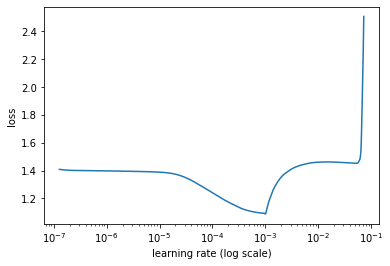

In [9]:
# step 4 [OPTIONAL] estimate the learning rate
learner.lr_find(show_plot=True, max_epochs=2)

In [10]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
378/378 [==============================] - 299s 761ms/step - loss: 1.1893 - accuracy: 0.4890 - val_loss: 0.2078 - val_accuracy: 0.9446
Epoch 2/4
378/378 [==============================] - 286s 754ms/step - loss: 0.1589 - accuracy: 0.9642 - val_loss: 0.1249 - val_accuracy: 0.9630
Epoch 3/4
378/378 [==============================] - 285s 753ms/step - loss: 0.0688 - accuracy: 0.9824 - val_loss: 0.0872 - val_accuracy: 0.9746
Epoch 4/4
378/378 [==============================] - 284s 751ms/step - loss: 0.0247 - accuracy: 0.9957 - val_loss: 0.0936 - val_accuracy: 0.9815


In [11]:
# step 6 [OPTIONAL] inspect the model
learner.view_top_losses(n=1, preproc=t)
print(X_test[0])

----------
id:349 | loss:5.47 | true:sci.med | pred:sci.electronics)

From: msunde01@mik.uky.edu (Mark  Underwood)
Subject: Re: How to the disks copy protected.
Article-I.D.: ms.C5x75A.48H
Reply-To: msunde01@mik.uky.edu
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 60
Nntp-Posting-Host: nx02.mik.uky.edu

In article <1r76sbINNkap@flop.ENGR.ORST.EDU> noeler@xanth.CS.ORST.EDU  
(Eric Richard Noel) writes:
> I hate hard copy manuals, and would rather have all docs online - *not*
> because I want to copy the program, but because its usually faster and
> and convenient than sifting through an old book I can't find.

Just MHO, but I prefer hardcopy books because you can have three or four  
of them open spread across the bed (next to the desk in my dorm) and  
reference them while using the program full-screen.  The Windows Help  
things come closest to good on-line documentation I've seen, but they  
generally aren't detailed enough and would probably take a LARGE amoun

In [12]:
# step 7 make predictions on new data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict('Jesus Christ is the central figure of Christianity.')

'talk.religion.misc'

In [14]:
import pandas
url = 'https://raw.githubusercontent.com/RamblerInvestmentFund/Automated-Sentiment-Analysis/main/Sentiment_Analysis/sample.csv'
col_list = ["timestamp", " article title"]
dr = pandas.read_csv(url, usecols=col_list)

predictor = ktrain.get_predictor(learner.model, preproc=t)
for i in dr[' article title']:
  print(predictor.predict(i))

sci.med
talk.politics.misc
sci.med


In [ ]:
!pip3 install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-8ua0v1a4
  Running command git clone -q https://github.com/amaiya/eli5 /tmp/pip-req-build-8ua0v1a4
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106832 sha256=f572152b57afbd8c413b0eb58d88932e3725f7d14af5bf3d62d42b258985557e
  Stored in directory: /tmp/pip-ephem-wheel-cache-zudeagvk/wheels/51/59/0a/0f48442b8d209583a4453580938d7ba2270aca40edacee6d45
Successfully built eli5


In [ ]:
predictor.explain('Jesus Christ is the central figure of Christianity.')

In [ ]:
# step 8 [OPTIONAL] save and load predictor
#predictor.save('my_20newsgroup_predictor.preproc')

predictor = ktrain.load_predictor('./my_20newsgroup_predictor.preproc')
predictor.get_classes()

predictor.predict('Jesus Christ is the central figure of Christianity.')

predictor.predict_proba('Jesus Christ is the central figure of Christianity.')

Exception: ignored

In [ ]:
y_pred_raw = predictor.predict(X_test)

In [ ]:
classes = predictor.get_classes()

classes.index(y_pred_raw[0])

3

In [ ]:
classes = predictor.get_classes()

y_pred = []
for i in range(len(y_pred_raw)):
  sample = y_pred_raw[i]
  y_pred.append(classes.index(sample))

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

acc

0.976063829787234

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[147,   1,   2,   2],
       [  0, 168,   0,   0],
       [  1,   3, 221,   0],
       [  7,   1,   1, 198]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       152
           1       0.97      1.00      0.99       168
           2       0.99      0.98      0.98       225
           3       0.99      0.96      0.97       207

    accuracy                           0.98       752
   macro avg       0.97      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

